## 1. Importing Libraries and reading data 

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import xgboost as xgb
from sklearn.metrics import roc_auc_score, confusion_matrix, ConfusionMatrixDisplay,accuracy_score, classification_report


In [3]:
# Read the dataset into a data frame
df = pd.read_csv('Diabetes_preprocessed.csv')


## 2. Preprocessing Data

In [4]:
# We will be dropping the clinical notes and since most people's smoking history is not known we will drop that too
df = df.drop(['clinical_notes','smoking_history'], axis=1)

In [5]:
df.columns

Index(['year', 'gender', 'age', 'location', 'race:AfricanAmerican',
       'race:Asian', 'race:Caucasian', 'race:Hispanic', 'race:Other',
       'hypertension', 'heart_disease', 'bmi', 'hbA1c_level',
       'blood_glucose_level', 'diabetes'],
      dtype='object')

In [6]:
# Dealing with categorical variables 
df = pd.get_dummies(df,columns=['gender'])  # Encoding the gender column 

#For location we will do frequency encoding
location_freq = df['location'].value_counts(normalize=True)
df['loc_freq'] = df['location'].map(location_freq)
df.drop(['location'],axis=1, inplace=True)

In [7]:
df.head()

,year,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,loc_freq
0,2020,32.0,0,0,0,0,1,0,0,27.32,5.0,100,0,True,False,False,0.02099
1,2015,29.0,0,1,0,0,0,0,0,19.95,5.0,90,0,True,False,False,0.02099
2,2015,18.0,0,0,0,0,1,0,0,23.76,4.8,160,0,False,True,False,0.02099
3,2015,41.0,0,0,1,0,0,0,0,27.32,4.0,159,0,False,True,False,0.02099
4,2016,52.0,1,0,0,0,0,0,0,23.75,6.5,90,0,True,False,False,0.02099


In [8]:
df.columns

Index(['year', 'age', 'race:AfricanAmerican', 'race:Asian', 'race:Caucasian',
       'race:Hispanic', 'race:Other', 'hypertension', 'heart_disease', 'bmi',
       'hbA1c_level', 'blood_glucose_level', 'diabetes', 'gender_Female',
       'gender_Male', 'gender_Other', 'loc_freq'],
      dtype='object')

In [9]:
# Dealing with numerical columns 
scaler = StandardScaler()
num_col = ['year', 'age','bmi','hbA1c_level','blood_glucose_level']
df[num_col] = scaler.fit_transform(df[num_col])
df.head()

,year,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,loc_freq
0,1.218003,-0.438416,0,0,0,0,1,0,0,0.000044,-0.493079,-0.934414,0,True,False,False,0.02099
1,-2.545921,-0.571707,0,1,0,0,0,0,0,-1.110113,-0.493079,-1.179935,0,True,False,False,0.02099
2,-2.545921,-1.060442,0,0,0,0,1,0,0,-0.536205,-0.679877,0.538712,0,False,True,False,0.02099
3,-2.545921,-0.038542,0,0,1,0,0,0,0,0.000044,-1.427069,0.514160,0,False,True,False,0.02099
4,-1.793136,0.450193,1,0,0,0,0,0,0,-0.537712,0.907905,-1.179935,0,True,False,False,0.02099


## 3. Feature Engineering 

We will here create another dataset and do some feature engineering to see if adding certain features contributes towards a better prediction 

In [10]:
#1. Age BMI interaction 
df['age_bmi'] = df['age'] * df['bmi']
df['comorbidity_count'] = df['hypertension'] + df['heart_disease']

## 4. Using different ML Algorithms

In [11]:
# Extract features and target variable
y = df['diabetes']
X = df.drop('diabetes', axis=1)
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.9703092783505155
Confusion Matrix:
[[17711    29]
 [  547  1113]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17740
           1       0.97      0.67      0.79      1660

    accuracy                           0.97     19400
   macro avg       0.97      0.83      0.89     19400
weighted avg       0.97      0.97      0.97     19400




LogisticRegression:

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     17740
           1       0.87      0.62      0.72      1660

    accuracy                           0.96     19400
   macro avg       0.92      0.81      0.85     19400
weighted avg       0.96      0.96      0.96     19400

AUC: 0.9594725010526888


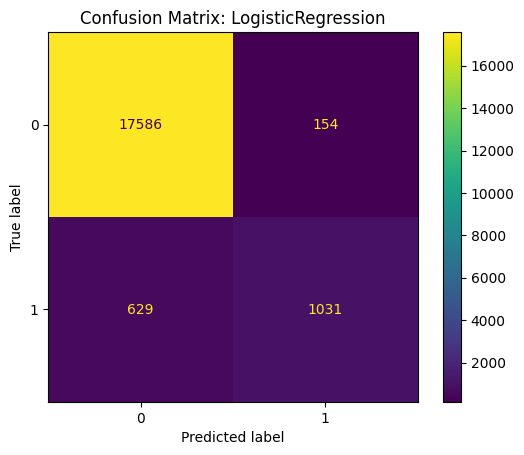


Random Forest:

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17740
           1       0.97      0.67      0.79      1660

    accuracy                           0.97     19400
   macro avg       0.97      0.83      0.89     19400
weighted avg       0.97      0.97      0.97     19400

AUC: 0.9617046257182054


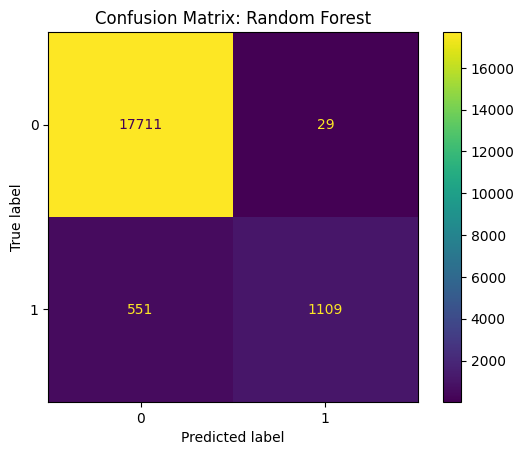


Gradient Boosting:

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17740
           1       0.99      0.67      0.80      1660

    accuracy                           0.97     19400
   macro avg       0.98      0.83      0.89     19400
weighted avg       0.97      0.97      0.97     19400

AUC: 0.9766945572594776


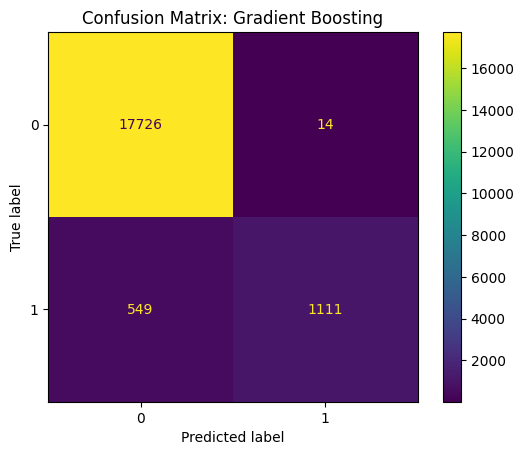


K-Nearest Neighbors:

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17740
           1       0.89      0.59      0.71      1660

    accuracy                           0.96     19400
   macro avg       0.93      0.79      0.84     19400
weighted avg       0.96      0.96      0.95     19400

AUC: 0.8967985017861752


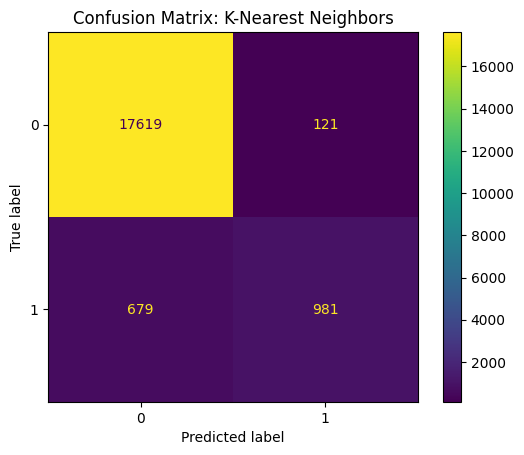

/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [13:41:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost:

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17740
           1       0.99      0.67      0.80      1660

    accuracy                           0.97     19400
   macro avg       0.98      0.83      0.89     19400
weighted avg       0.97      0.97      0.97     19400

AUC: 0.9768077213023458


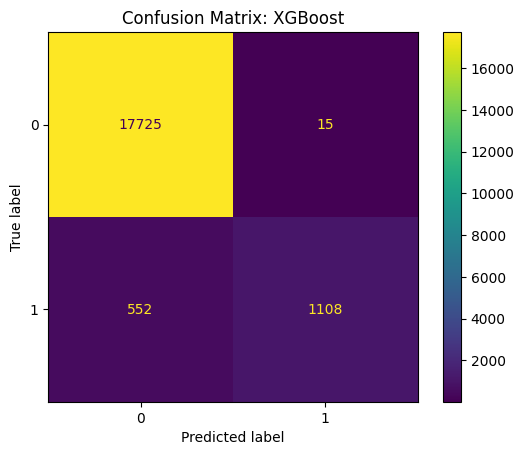

In [12]:
# Different models to classify
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000), 
    "Random Forest" : RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "XGBoost": xgb.XGBClassifier(n_estimators=50, max_depth=3, use_label_encoder=False, eval_metric='logloss')

}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"\n{name}:\n")
    print(classification_report(y_test, y_pred))
    
    y_probs = model.predict_proba(X_test)[:, 1]
    print("AUC:", roc_auc_score(y_test, y_probs))
    
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm)
    fig, ax = plt.subplots()
    disp.plot(ax=ax)
    ax.set_title(f"Confusion Matrix: {name}")
    plt.show()


| Model | Precision | Recall | F1-Score | AUC|
|-------|-----------|--------|----------|----|
|Random Forest | 0.80   |   0.74 |     0.77 | 0.96924 |
|Gradient Boosting | 0.77   |   0.77   |   0.77 | 0.97608 |
|XGBoost | 0.88   |   0.73    |  0.80 | 0.97707 |

In [13]:
import joblib

best_model = models["XGBoost"]
joblib.dump(best_model, 'best_diabetes_model.pkl')

['best_diabetes_model.pkl']